## Loading and Preparing Data

In [26]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

In [27]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [28]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [29]:
x_train.shape

(27455, 28, 28, 1)

In [30]:
x_valid.shape

(7172, 28, 28, 1)

In [31]:
x_train.shape, x_valid.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

## Model Creation

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)         

## Compiling

In [34]:
#Compiling the Model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 5s 6ms/step - loss: 0.3139 - accuracy: 0.9028 - val_loss: 0.6329 - val_accuracy: 0.8402
Epoch 2/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 0.1676 - val_accuracy: 0.9416
Epoch 3/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.1411 - val_accuracy: 0.9621
Epoch 4/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.3141 - val_accuracy: 0.9194
Epoch 5/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.2449 - val_accuracy: 0.9446
Epoch 6/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1530 - val_accuracy: 0.9653
Epoch 7/20
858/858 [==============================] - 5s 5ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.2849 - val_accuracy: 0.9391
Epoch 

## Plot

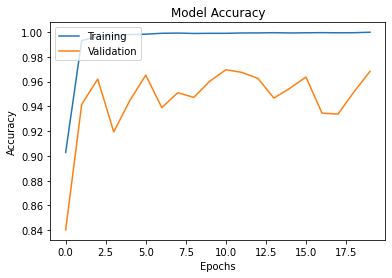

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'], loc = 'upper left')
plt.savefig('second.png')
